In [2]:
import pandas as pd
import numpy as np

Тип данных pd.DataFrame представляет собой двумерную таблицу с данными. Имеет индекс и набор столбцов (возможно, имеющих разные типы). 

Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [3]:
# загрузка таблички
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
data = pd.read_csv(pass_link) 

In [5]:
print('Всего пассажиров: ', len(data))
data.tail(4)

Всего пассажиров:  891


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
# выбор нужных колонок
data[['Name', 'Age', 'Sex']].to_excel('test.xlsx', index=False)

In [7]:
# выбор нужных строк
data.iloc[:1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [8]:
# выбор нужных строк c конца
data.iloc[-2:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# переименование колонок
data = data.rename(columns={
    "SibSp": "братьев/систер/муж/жена",
    "Parch": "детей/родителей",
    "Fare": "цена билета"
})
data.head(2)

,PassengerId,Pclass,Name,Sex,Age,братьев/систер/муж/жена,детей/родителей,Ticket,цена билета,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
# число строк, столбцов
data.shape

(891, 11)

In [11]:
# типы колонок, пропуски в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              891 non-null    int64  
 1   Pclass                   891 non-null    int64  
 2   Name                     891 non-null    object 
 3   Sex                      891 non-null    object 
 4   Age                      714 non-null    float64
 5   братьев/систер/муж/жена  891 non-null    int64  
 6   детей/родителей          891 non-null    int64  
 7   Ticket                   891 non-null    object 
 8   цена билета              891 non-null    float64
 9   Cabin                    204 non-null    object 
 10  Embarked                 889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
# основные статистики по колонкам
data.describe()

,PassengerId,Pclass,Age,братьев/систер/муж/жена,детей/родителей,цена билета
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# максимальный, минимальный возраст пассажиров
data['Age'].max(), data.Age.min(), round(data.Age.mean(), 2)

(80.0, 0.42, 29.7)

In [15]:
# число мужчин/женщин
data['Sex'].value_counts() #-- очень полезная функция!

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# сгруппируем записи по классам пассажиров, 
# в каждой группе посчитаем средний возраст
data.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [17]:
data[(data['Sex'] == 'female') & (data['Age'] >= 40)] 

,PassengerId,Pclass,Name,Sex,Age,братьев/систер/муж/жена,детей/родителей,Ticket,цена билета,Cabin,Embarked
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
40,41,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
132,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
161,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
177,178,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
194,195,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
195,196,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


<Axes: >

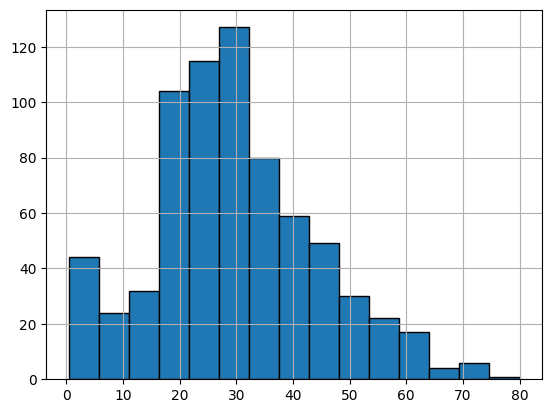

In [24]:
# распределение по возрасту
data['Age'].hist(ec='k', bins=15)

In [ ]:
# скачиваем табличку по летальности
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
surv_data = pd.read_csv(surv_link)
surv_data.head()

In [ ]:
# создаем колонку PassengerId из индексов в табличке surv_data
surv_data['PassengerId'] = surv_data.index

In [ ]:
# соединяем таблички по колонке 'PassengerId'
data = data.merge(surv_data, on='PassengerId')
data.head(2)

In [ ]:
# посчитаем кол-во выживших
surv_pass = data[data['Survived'] == 1]
print('кол-во выживших на титанике: ', surv_pass['Survived'].sum())
print('Всего пассажиров: ', len(data))

In [ ]:
# посчитаем кол-во выживших мужчин и женщин
data.groupby(['Sex', 'Survived'])['PassengerId'].count()